In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_train = pd.read_csv("./dataset/my_train_features.csv")
df_test = pd.read_csv("./dataset/my_train_features.csv")

In [3]:
df_train.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,backward,upperside,1307.2,straight,small,Agreeableness
1,backward,upperside,932.0,right,small,Agreeableness
2,forward,upperside,891.4,straight,small,Agreeableness
3,forward,upperside,279.6,straight,small,Agreeableness
4,vertical,upperside,766.0,straight,small,Agreeableness


In [4]:
df_test.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,backward,upperside,1307.2,straight,small,Agreeableness
1,backward,upperside,932.0,right,small,Agreeableness
2,forward,upperside,891.4,straight,small,Agreeableness
3,forward,upperside,279.6,straight,small,Agreeableness
4,vertical,upperside,766.0,straight,small,Agreeableness


In [5]:
letter_slant_mapping = {'backward': -1, 'forward': 1, 'vertical': 0}
line_slant_mapping = {'lowerside': -1, 'baseline': 0, 'upperside': 1}
margin_slope_mapping = {'left': -1, 'straight': 0, 'right': 1}
word_spacing_mapping = {'small': -1, 'medium': 0, 'large': 1}

In [6]:
df_train["letter_slant"] = df_train["letter_slant"].map(letter_slant_mapping)
df_train["line_slant"] = df_train["line_slant"].map(line_slant_mapping)
df_train["margin_slope"] = df_train["margin_slope"].map(margin_slope_mapping)
df_train["word_spacing"] = df_train["word_spacing"].map(word_spacing_mapping)
df_test["letter_slant"] = df_test["letter_slant"].map(letter_slant_mapping)
df_test["line_slant"] = df_test["line_slant"].map(line_slant_mapping)
df_test["margin_slope"] = df_test["margin_slope"].map(margin_slope_mapping)
df_test["word_spacing"] = df_test["word_spacing"].map(word_spacing_mapping)

In [7]:
df_train.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,-1,1,1307.2,0,-1,Agreeableness
1,-1,1,932.0,1,-1,Agreeableness
2,1,1,891.4,0,-1,Agreeableness
3,1,1,279.6,0,-1,Agreeableness
4,0,1,766.0,0,-1,Agreeableness


In [8]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  177 non-null    int64  
 1   line_slant    177 non-null    int64  
 2   letter_size   177 non-null    float64
 3   margin_slope  177 non-null    int64  
 4   word_spacing  177 non-null    int64  
 5   personality   177 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 8.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  177 non-null    int64  
 1   line_slant    177 non-null    int64  
 2   letter_size   177 non-null    float64
 3   margin_slope  177 non-null    int64  
 4   word_spacing  177 non-null    int64  
 5   personality   177 non-null    object 
dtypes: float64(1), int64(4), object(

In [9]:
df_train.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
margin_slope    0
word_spacing    0
personality     0
dtype: int64

In [10]:
df_test.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
margin_slope    0
word_spacing    0
personality     0
dtype: int64

In [11]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [12]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  177 non-null    int64  
 1   line_slant    177 non-null    int64  
 2   letter_size   177 non-null    float64
 3   margin_slope  177 non-null    int64  
 4   word_spacing  177 non-null    int64  
 5   personality   177 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 8.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  177 non-null    int64  
 1   line_slant    177 non-null    int64  
 2   letter_size   177 non-null    float64
 3   margin_slope  177 non-null    int64  
 4   word_spacing  177 non-null    int64  
 5   personality   177 non-null    object 
dtypes: float64(1), int64(4), object(

In [13]:
x_train = df_train.drop('personality', axis=1)
y_train = df_train['personality']
x_test = df_test.drop('personality', axis=1)
y_test = df_test['personality']

In [14]:
dtree = DecisionTreeClassifier()
dtree_res = dtree.fit(x_train, y_train)

In [15]:
y_pred = dtree.predict(x_test)
print(y_pred)

['Agreeableness' 'Agreeableness' 'Agreeableness' 'Agreeableness'
 'Agreeableness' 'Agreeableness' 'Agreeableness' 'Agreeableness'
 'Agreeableness' 'Agreeableness' 'Agreeableness' 'Agreeableness'
 'Agreeableness' 'Agreeableness' 'Agreeableness' 'Agreeableness'
 'Agreeableness' 'Agreeableness' 'Agreeableness' 'Agreeableness'
 'Agreeableness' 'Agreeableness' 'Agreeableness' 'Agreeableness'
 'Agreeableness' 'Agreeableness' 'Agreeableness' 'Agreeableness'
 'Agreeableness' 'Agreeableness' 'Conscientiousness' 'Conscientiousness'
 'Conscientiousness' 'Conscientiousness' 'Conscientiousness'
 'Conscientiousness' 'Conscientiousness' 'Conscientiousness'
 'Conscientiousness' 'Conscientiousness' 'Conscientiousness'
 'Conscientiousness' 'Conscientiousness' 'Conscientiousness'
 'Conscientiousness' 'Conscientiousness' 'Conscientiousness'
 'Conscientiousness' 'Conscientiousness' 'Conscientiousness'
 'Conscientiousness' 'Conscientiousness' 'Conscientiousness'
 'Conscientiousness' 'Conscientiousness' 'Con

In [16]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

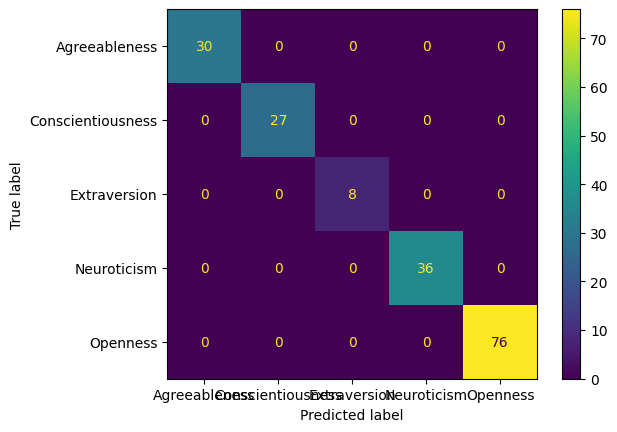

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()

In [19]:
dtree.feature_importances_

array([0.09921795, 0.05158323, 0.70999096, 0.06938585, 0.06982201])

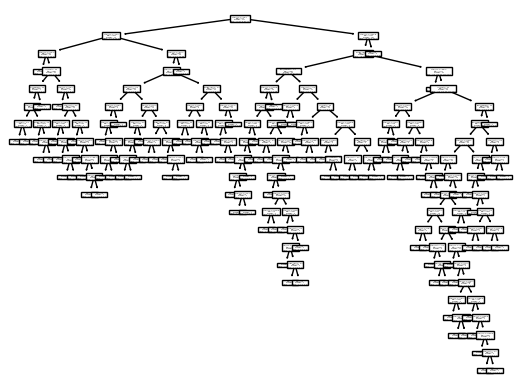

In [20]:
tree.plot_tree(dtree_res, feature_names=list(df_test.columns))
# plt.savefig(sys.stdout.buffer)
sys.stdout.flush()